# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [2]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [18]:
aviation_df_clean = pd.read_csv('AviationData_Clean.csv', low_memory=False)
aviation_df_clean.value_counts()

Event.Id        Investigation.Type  Accident.Number  Event.Date  Location         Country        Airport.Code  Airport.Name               Injury.Severity  Aircraft.damage  Registration.Number  Make               Model      Amateur.Built  Number.of.Engines  Engine.Type    Purpose.of.flight  Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  Weather.Condition  Broad.phase.of.flight  Report.Status   Publication.Date  Total.People  Serious_fatal_rate  Aircraft.Destroyed  Make_Model               Numbers.of.Engines
20001204X00000  Accident            ANC99FA021       1999-01-10  QUINHAGAK, AK    United States  AQH           QUINHAGAK                  Non-Fatal        Substantial      N6312H               CESSNA             207        No             1.0                RECIPROCATING  UNKNOWN            0.0                   0.0                     1.0                   0.0              VMC                APPROACH               Probable Cause  31-03-2000      

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [59]:
#Sorting Large and Small planes
aviation_df_clean['Size'] = aviation_df_clean['Total.People'].apply(lambda x: 'Small' if pd.to_numeric(x, errors='coerce') <= 20 else 'Large')

aviation_df_clean['Size'].value_counts()

small_planes = aviation_df_clean[(aviation_df_clean['Size'] == 'Small') & (aviation_df_clean['Serious_fatal_rate'].notna())]
large_planes = aviation_df_clean[(aviation_df_clean['Size'] == 'Large') & (aviation_df_clean['Serious_fatal_rate'].notna())]

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [60]:

# Top 15 small planes with least fatalities/serious injuries
lowest_harm_small_plane = (aviation_df_clean[aviation_df_clean['Size'] == 'Small'][['Size', 'Make', 'Serious_fatal_rate']].dropna().nsmallest(15, 'Serious_fatal_rate'))

# Top 15 large planes with least fatalities/serious injuries
lowest_harm_large_plane = (aviation_df_clean[aviation_df_clean['Size'] == 'Large'][['Size', 'Make', 'Serious_fatal_rate']].dropna().nsmallest(15, 'Serious_fatal_rate'))


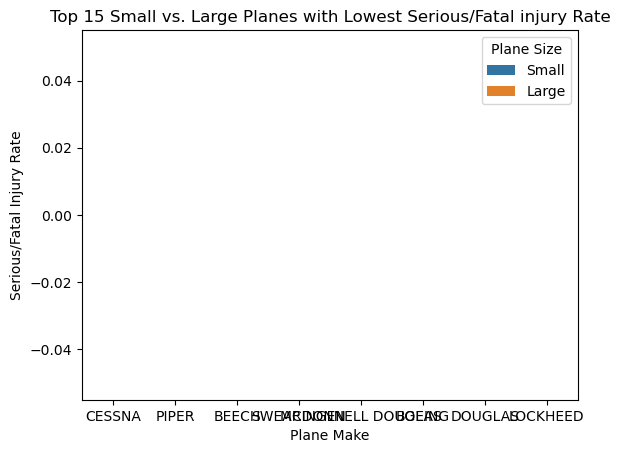

In [61]:
#Plot 
combined_top15 = pd.concat([lowest_harm_small_plane, lowest_harm_large_plane])


sns.barplot(data=combined_top15, x='Make', y='Serious_fatal_rate', hue='Size')

plt.title('Top 15 Small vs. Large Planes with Lowest Serious/Fatal injury Rate')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Plane Make')

plt.legend(title='Plane Size')
plt.show()


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

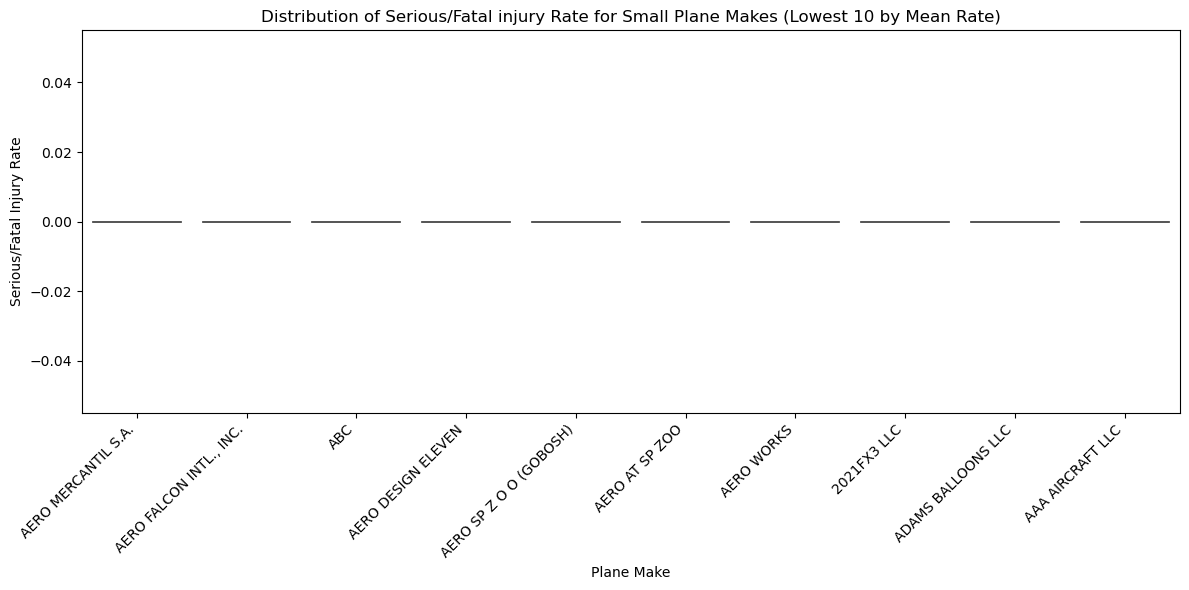

In [62]:
small_planes_distro = aviation_df_clean[(aviation_df_clean['Size'] == 'Small') & (aviation_df_clean['Serious_fatal_rate'].notna())]

small_make_means = (small_planes_distro.groupby('Make')['Serious_fatal_rate'].mean().nsmallest(10).index)

small_planes_filter = small_planes_distro[small_planes_distro['Make'].isin(small_make_means)]

plt.figure(figsize=(12, 6))

sns.violinplot(data=small_planes_filter, x='Make', y='Serious_fatal_rate', inner='box')

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Serious/Fatal injury Rate for Small Plane Makes (Lowest 10 by Mean Rate)')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Plane Make')
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

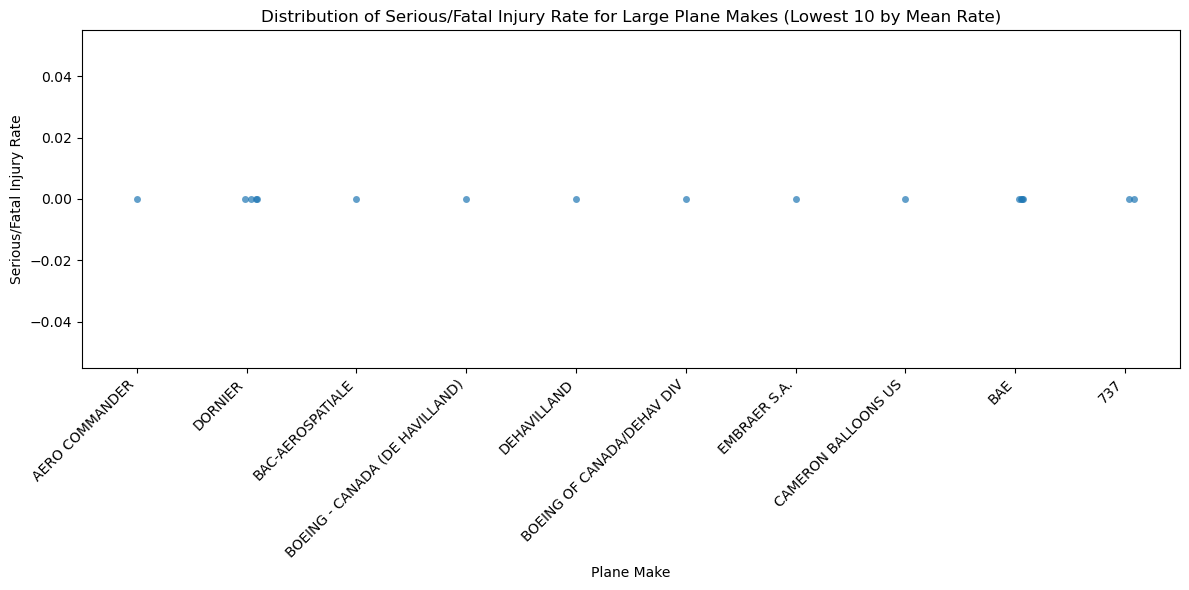

In [63]:

large_planes_distro = aviation_df_clean[
    (aviation_df_clean['Size'] == 'Large') & (aviation_df_clean['Serious_fatal_rate'].notna())]

lowest_10_large_makes = (
    large_planes_distro.groupby('Make')['Serious_fatal_rate'].mean().nsmallest(10).index)

filtered_large_planes = large_planes_distro[
    large_planes_distro['Make'].isin(lowest_10_large_makes)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=filtered_large_planes, x='Make', y='Serious_fatal_rate', jitter=True, alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Serious/Fatal Injury Rate for Large Plane Makes (Lowest 10 by Mean Rate)')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Plane Make')
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [67]:

aviation_df_clean['Aircraft.Destroyed'] = aviation_df_clean['Aircraft.Destroyed'].astype(bool)

valid_planes = aviation_df_clean.dropna(subset=['Make', 'Size'])

destruction_rate = (valid_planes.groupby(['Size', 'Make'])['Aircraft.Destroyed'].mean().reset_index(name='Destruction_Rate'))

lowest_destruction_rates = destruction_rate.sort_values('Destruction_Rate', ascending=True).head(15)

print(lowest_destruction_rates)

       Size                            Make  Destruction_Rate
0     Large                             737               0.0
1176  Small              M-SQUARED AIRCRAFT               0.0
1175  Small                       M-SQUARED               0.0
1174  Small                       M SQUARED               0.0
1173  Small                    LYONS ROBERT               0.0
1172  Small                           LYONS               0.0
1171  Small                      LUY WAYMAN               0.0
1170  Small  LUSCOMBE SILVAIRE AIRCRAFT CO.               0.0
1168  Small        LTV AEROSPACE INDUSTRIES               0.0
1167  Small                 LSA AMERICA INC               0.0
1178  Small                    M7 AEROSPACE               0.0
1165  Small                     LORAL CORP.               0.0
1163  Small                         LONGREN               0.0
1162  Small            LOEHLE AIRCRAFT CORP               0.0
1161  Small                          LOEHLE               0.0


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:
#All top 10 aircrafts have 0 fatality rates and are recommended aircraft options. 

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

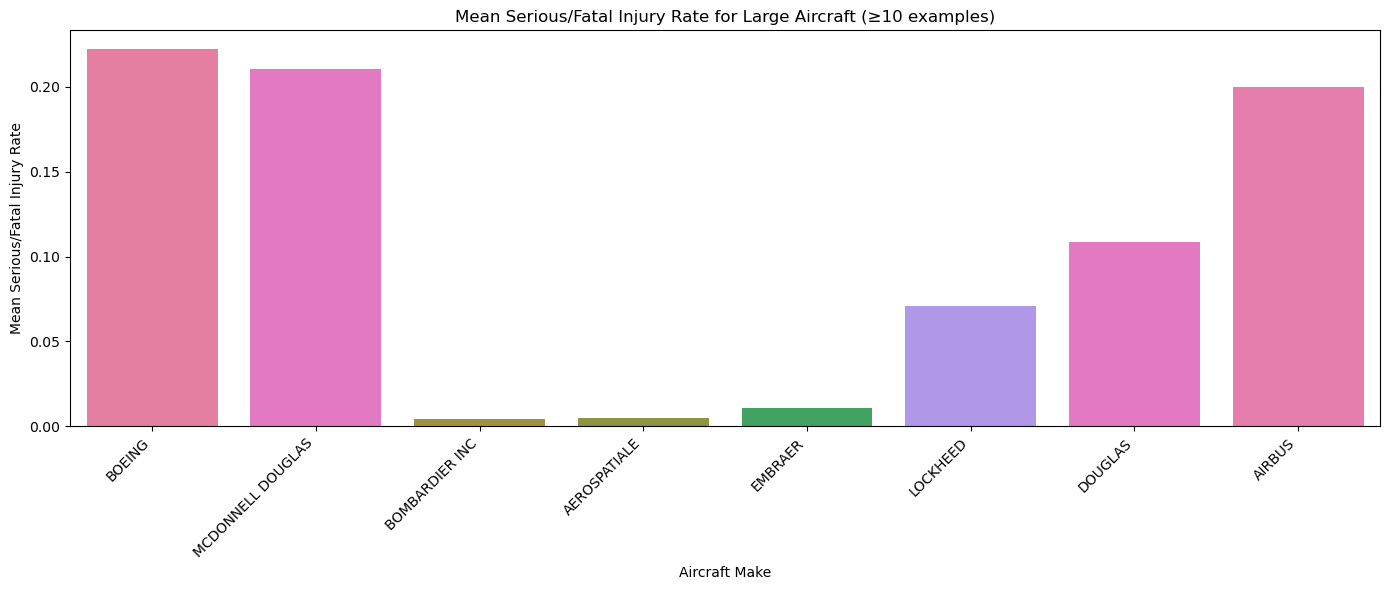

In [ ]:
 
large_planes = aviation_df_clean[(aviation_df_clean['Size'] == 'Large') &(aviation_df_clean['Serious_fatal_rate'].notna()) &(aviation_df_clean['Make'].notna()) & (aviation_df_clean['Model'].notna())]

model_counts = large_planes.groupby(['Make', 'Model']).size().reset_index(name='Count')

valid_models = model_counts[model_counts['Count'] >= 10]

large_planes_valid = pd.merge(large_planes,valid_models[['Make', 'Model']],on=['Make', 'Model'],how='inner')

mean_rates_large = (large_planes_valid.groupby(['Make', 'Model'])['Serious_fatal_rate'].mean().reset_index().sort_values(by='Serious_fatal_rate'))

plt.figure(figsize=(14, 6))
sns.barplot(data=mean_rates_large, x='Make', y='Serious_fatal_rate', hue='Model', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title('Mean Serious/Fatal Injury Rate for Large Aircraft (≥10 examples)')
plt.ylabel('Mean Serious/Fatal Injury Rate')
plt.xlabel('Aircraft Make')
plt.legend([],[], frameon=False)  
plt.tight_layout()
plt.show()


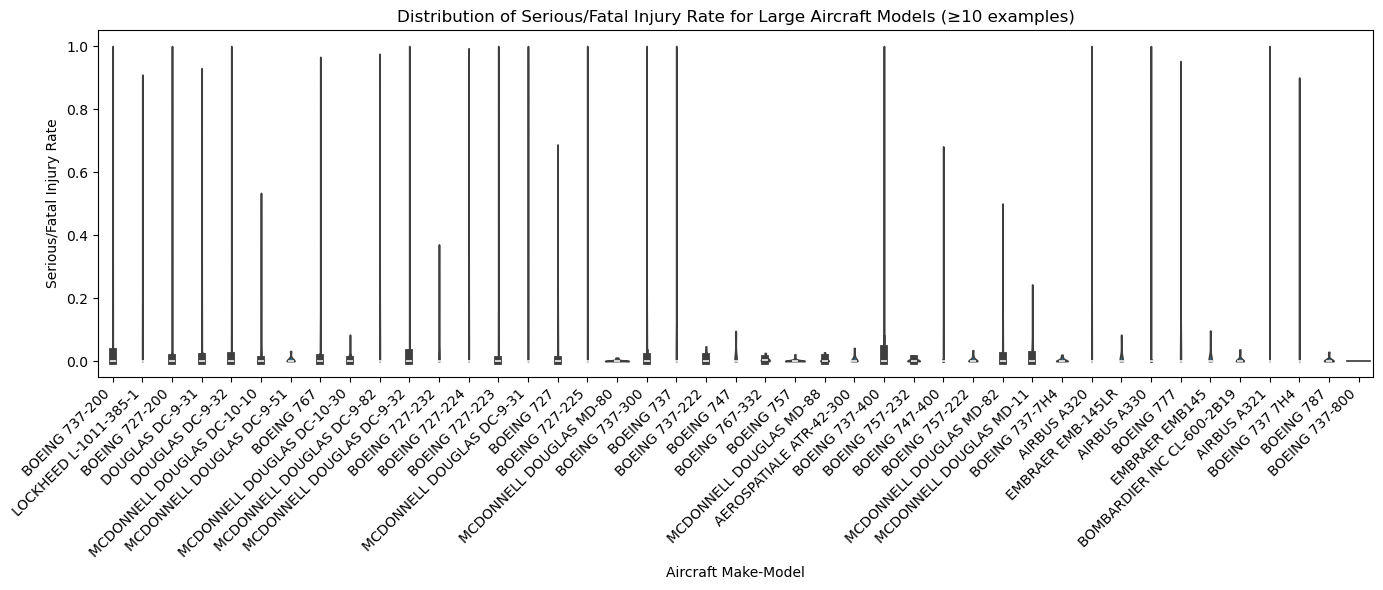

In [81]:
large_planes_valid['Make_Model'] = large_planes_valid['Make'] + ' ' + large_planes_valid['Model']

plt.figure(figsize=(14, 6))
sns.violinplot(data=large_planes_valid,x='Make_Model',y='Serious_fatal_rate',inner='box',cut=0)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Serious/Fatal Injury Rate for Large Aircraft Models (≥10 examples)')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Aircraft Make-Model')
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

/var/folders/j2/9146gk_x781cv819nkljbgb80000gn/T/ipykernel_9447/1940388451.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


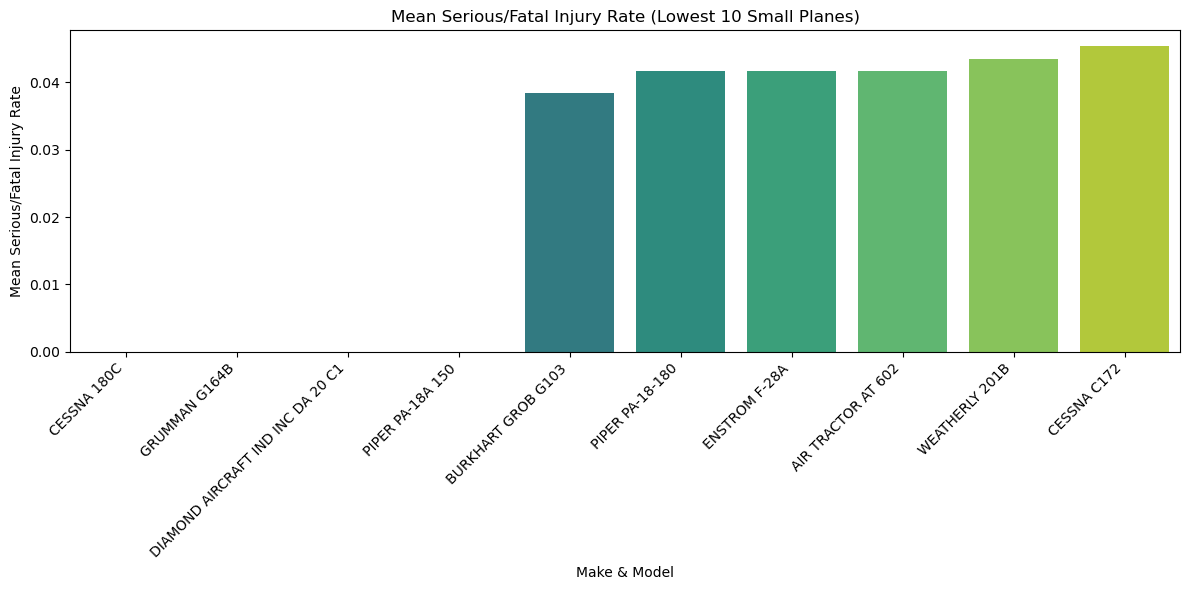

In [82]:

model_counts = small_planes.groupby(['Make', 'Model']).size().reset_index(name='Count')

valid_models = model_counts[model_counts['Count'] >= 10]

small_planes_valid = pd.merge(small_planes, valid_models[['Make', 'Model']], on=['Make', 'Model'], how='inner')

small_planes_valid['Make_Model'] = small_planes_valid['Make'] + ' ' + small_planes_valid['Model']

mean_rates_small = (small_planes_valid.groupby('Make_Model')['Serious_fatal_rate'].mean().reset_index().sort_values(by='Serious_fatal_rate'))

lowest_10_small = mean_rates_small.head(10)

small_planes_filter = small_planes_valid[small_planes_valid['Make_Model'].isin(lowest_10_small['Make_Model'])]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=lowest_10_small,
    x='Make_Model',
    y='Serious_fatal_rate',
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.title('Mean Serious/Fatal Injury Rate (Lowest 10 Small Planes)')
plt.xlabel('Make & Model')
plt.ylabel('Mean Serious/Fatal Injury Rate')
plt.tight_layout()
plt.show()



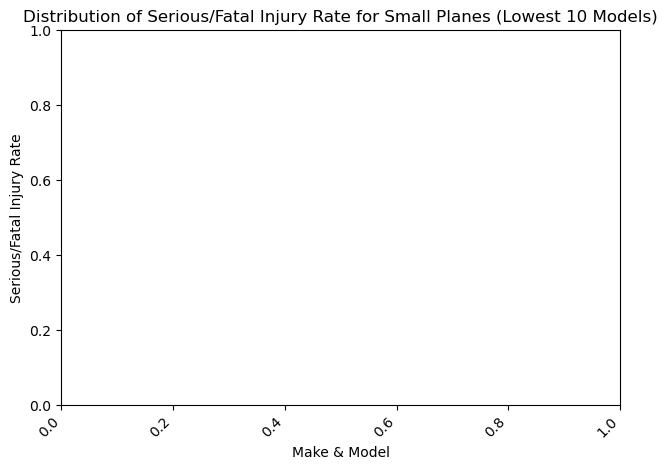

In [72]:
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Serious/Fatal Injury Rate for Small Planes (Lowest 10 Models)')
plt.xlabel('Make & Model')
plt.ylabel('Serious/Fatal Injury Rate')
plt.tight_layout()
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
#Discussion: 

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

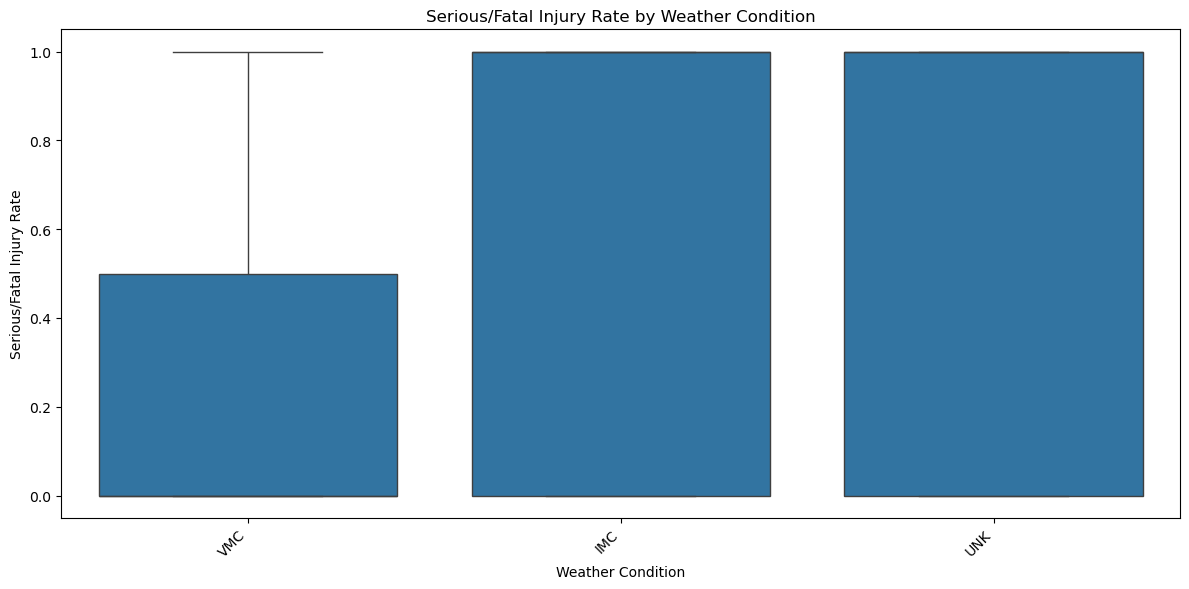

In [ ]:
#Weather Condition
aviation_df_clean['Weather.Condition'].value_counts()

# Filter
weather_df = aviation_df_clean[
    aviation_df_clean['Serious_fatal_rate'].notna() & 
    aviation_df_clean['Weather.Condition'].notna()]
# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_df, x='Weather.Condition', y='Serious_fatal_rate')
plt.xticks(rotation=45, ha='right')
plt.title('Serious/Fatal Injury Rate by Weather Condition')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Weather Condition')
plt.tight_layout()
plt.show()

In [80]:
#Discussion:  VMC or Visual Meterological Conditions show the lowest median serious/fatal rate. It is also the largest sample size, meaning most planes took flew during prime conditions. There is a higher risk of flying during IMC or poorer weather conditions resulting in a higher median injury and fatality rate.

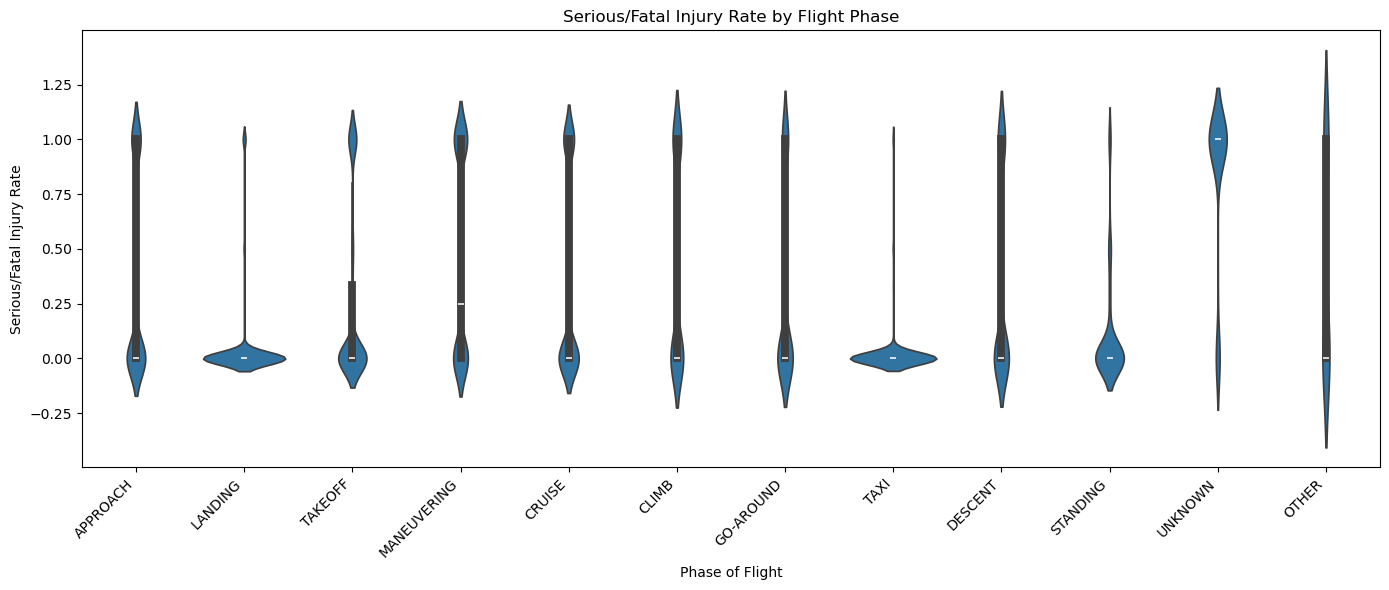

In [84]:
#Phase of Flight
phase_df = aviation_df_clean[aviation_df_clean['Broad.phase.of.flight'].notna() & aviation_df_clean['Serious_fatal_rate'].notna() & aviation_df_clean['Aircraft.damage'].notna()].copy()

phase_df['Destroyed'] = phase_df['Aircraft.damage'].str.upper().str.strip() == 'DESTROYED'

#Plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=phase_df, x='Broad.phase.of.flight', y='Serious_fatal_rate', inner='box')
plt.xticks(rotation=45, ha='right')
plt.title('Serious/Fatal Injury Rate by Flight Phase')
plt.ylabel('Serious/Fatal Injury Rate')
plt.xlabel('Phase of Flight')
plt.tight_layout()
plt.show()

In [ ]:
#Discussion: There is a lot of variability between flight phases. We show that Taxi, Landing, and Standing all have lower mean injury rates. Some techniques like climbing, cruising, maneuvering, and approaching, all have low mean injury rates, but when fatality or injury occurs it is significant. 